In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's take a look at a fabricated data set. This data looks at employees, with 5 numeric variables and an outcome called **retain** which indicates if the employee stayed or left the job.

In [19]:
work = pd.read_csv('../data/work_retention.csv')

In [20]:
work.head()

,age,children,commute,salary,years worked,retain
0,63,0,0.095167,54233,2.18,1
1,64,0,0.044500,64739,4.53,1
2,40,1,0.159167,95953,4.57,1
3,58,5,0.091167,59038,2.99,1
4,63,0,0.016000,7958,4.36,1


You should always have a look at your data before starting analysis. This includes univariate and bivariate exploration, and as we will talk about soon, multi-variate exploration. First, we will separate out retain, since it is the thing we would want to predict and it's not actually numeric (if we were creating a model...but we aren't!):

In [21]:
X_df = work.drop(columns=["retain"])
y = work['retain']

In [22]:
X_df

,age,children,commute,salary,years worked
0,63,0,0.095167,54233,2.18
1,64,0,0.044500,64739,4.53
2,40,1,0.159167,95953,4.57
3,58,5,0.091167,59038,2.99
4,63,0,0.016000,7958,4.36
...,...,...,...,...,...
195,61,0,0.883333,21661,0.82
196,37,0,0.883333,17181,1.29
197,56,1,1.116667,63675,0.91
198,36,4,1.166667,45895,0.97


Let's take a look at the distribution of our data. We could look at multiple box plots, or even easier, a strip chart:

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


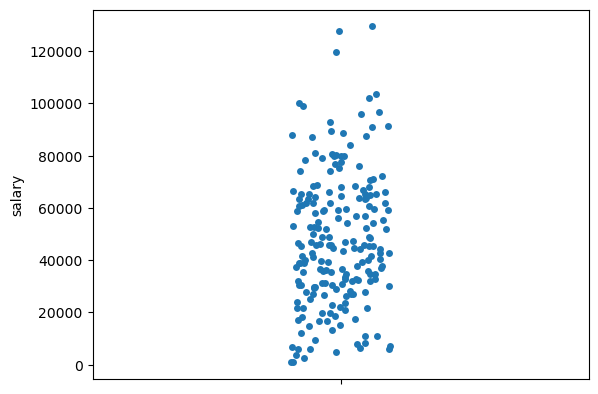

In [17]:
sns.stripplot(data = X_df['salary'])
plt.show()

In [23]:
X_df.describe()

,age,children,commute,salary,years worked
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.515000,1.015000,0.377489,47822.830000,2.866100
std,12.026761,1.044139,0.357103,25615.860784,1.371668
min,25.000000,0.000000,0.003667,881.000000,0.020000
25%,35.000000,0.000000,0.104750,30450.250000,1.977500
50%,42.500000,1.000000,0.242917,45571.500000,3.120000
75%,56.000000,2.000000,0.539583,64389.500000,3.910000
max,65.000000,5.000000,1.250000,129488.000000,4.990000


What is really going on????

In [24]:
from sklearn.preprocessing import StandardScaler as SS

In [25]:
#summon the thing

ss = SS()
X_scaled = ss.fit_transform(X_df)

In [29]:
X_scaled[:5] #What type of object is this???

array([[ 1.54084594, -0.97453223, -0.79257466,  0.25087019, -0.50144898],
       [ 1.6242025 , -0.97453223, -0.93481311,  0.66203591,  1.21609234],
       [-0.37635485, -0.01440195, -0.61290503,  1.88363565,  1.24532708],
       [ 1.12406316,  3.82611916, -0.80380401,  0.43892   ,  0.09055463],
       [ 1.54084594, -0.97453223, -1.01482224, -1.56016102,  1.09184467]])

In [30]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = X_df.columns

In [31]:
X_scaled_df.head()

,age,children,commute,salary,years worked
0,1.540846,-0.974532,-0.792575,0.250870,-0.501449
1,1.624202,-0.974532,-0.934813,0.662036,1.216092
2,-0.376355,-0.014402,-0.612905,1.883636,1.245327
3,1.124063,3.826119,-0.803804,0.438920,0.090555
4,1.540846,-0.974532,-1.014822,-1.560161,1.091845


/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


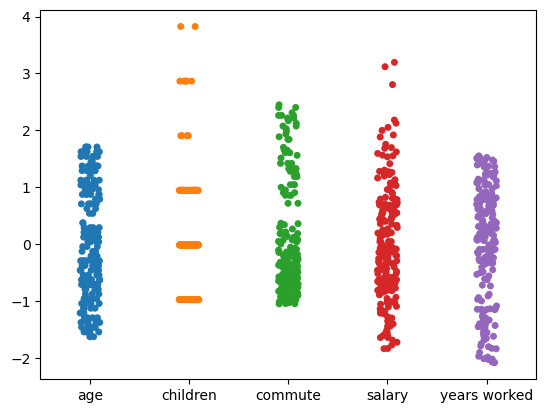

In [32]:
sns.stripplot(data = X_scaled_df)
plt.show()

What do you think now?

Let's look at a matrix of correlation coefficients for these 5 variables. We will look using both the scaled and unscaled data - see if you notice anything.

In [33]:
#Scaled
corr_matrix = # what is this?
corr_matrix

array([[ 1.        ,  0.78370666, -0.00657611, ...,  0.17475415,
        -0.61309302,  0.1276617 ],
       [ 0.78370666,  1.        ,  0.39161877, ..., -0.38374063,
        -0.9622114 , -0.40181396],
       [-0.00657611,  0.39161877,  1.        , ..., -0.56738618,
        -0.52427622, -0.90717534],
       ...,
       [ 0.17475415, -0.38374063, -0.56738618, ...,  1.        ,
         0.47048069,  0.85962137],
       [-0.61309302, -0.9622114 , -0.52427622, ...,  0.47048069,
         1.        ,  0.530926  ],
       [ 0.1276617 , -0.40181396, -0.90717534, ...,  0.85962137,
         0.530926  ,  1.        ]])

In [34]:
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap='BuPu', vmin=-1, vmax=1,
            annot=True, fmt='.2f', 
           mask = mask)
plt.tick_params(size = 0, labelsize = 12)
plt.xticks(rotation = 90)
plt.show()

KeyboardInterrupt: 

In [ ]:
#Unscaled
corr_matrix = #how do we get this?
corr_matrix

In [ ]:
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap='BuPu', vmin=-1, vmax=1,
            annot=True, fmt='.2f', 
           mask = mask)
plt.tick_params(size = 0, labelsize = 12)
plt.xticks(rotation = 90)
plt.show()

Let's plot the two most highly correlated variables:

In [ ]:
plt.show()

That's interesting! We need some fancier plotting code...

In [ ]:
#We could just use work, but let's do this the hard way
sns.scatterplot(data = X_df, x = 'years worked', y = 'commute', hue = 'retain',
                palette = ['cornflowerblue','grey'])
plt.show()

What do you notice? Do you think it matters if we plot the scaled versus the unscaled data?
  
We will use variations of this code, and more complex code, throughout the semester, so it is critical that you understand it (and there may even be a question in the homework or an exam about code like this!). 